<a href="https://colab.research.google.com/github/EntropyP/CRM_Analytics/blob/main/Assignment03_Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment03 : Product Recommendation**

The objective of this assignment is to perform product recommendation from the purchasing historical data of small group of customers (around 30 persons) applying Association rule and Apriori algorithm

# **Set up**

In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import and Data Cleansing**

Import data with utf8 encoding to handle thai language.

In [ ]:
import pandas as pd

#Import data
df = pd.read_csv('/content/drive/My Drive/BADS7105 CRM/Prod_Rec.csv',encoding = 'utf8')
df.head(5)

Timestamp Running shoes  ...      Cactus    ROV Skin
0  10/28/2021 14:05       เคยซื้อ  ...  ไม่เคยซื้อ  ไม่เคยซื้อ
1  10/28/2021 14:06       เคยซื้อ  ...  ไม่เคยซื้อ     เคยซื้อ
2  10/28/2021 14:06       เคยซื้อ  ...  ไม่เคยซื้อ  ไม่เคยซื้อ
3  10/28/2021 14:06       เคยซื้อ  ...  ไม่เคยซื้อ  ไม่เคยซื้อ
4  10/28/2021 14:06       เคยซื้อ  ...  ไม่เคยซื้อ  ไม่เคยซื้อ

[5 rows x 24 columns]

Check for missing data

In [ ]:
missing = df.isnull().sum()
print(missing)

Timestamp                0
Running shoes            0
Crispy Veggie            0
Training Courses         0
Nintendo Switch          0
Bitcoin                  0
Mechanical Keyboard      0
Dyson                    0
Ipad Case                0
Level-ajustable Table    0
Pimripie's Products      0
Bluetooth Earpods        0
Starbucks Cup            0
Seat Cushion             0
Coffee Machine           0
Air Ticket               0
Ebook                    0
Refrigerator             0
Film Camera              0
Musical Instruments      0
Whey Protein             0
Sacred object            0
Cactus                   0
ROV Skin                 0
dtype: int64


Convert the cateforical data (0 = ไม่เคยซื้อ , 1 = เคยซื้อ)

In [ ]:
def int_convert(x):
    if x == 'ไม่เคยซื้อ':
        return 0
    if x == 'เคยซื้อ':
        return 1
df = df.applymap(int_convert)

In [ ]:
df.head()

Timestamp  Running shoes  Crispy Veggie  ...  Sacred object  Cactus  ROV Skin
0      None              1              1  ...              1       0         0
1      None              1              0  ...              0       0         1
2      None              1              0  ...              0       0         0
3      None              1              0  ...              0       0         0
4      None              1              1  ...              0       0         0

[5 rows x 24 columns]

You will find that the Refrigerator and Timestamp column is incompleted and not able to be in the recommendation. 

In [ ]:
try:
  df.drop('Refrigerator', inplace=True, axis=1)
except:
  pass

try:
  df.drop('Timestamp', inplace=True, axis=1)
except:
  pass  

In [ ]:
df.head()

Running shoes  Crispy Veggie  ...  Cactus  ROV Skin
0              1              1  ...       0         0
1              1              0  ...       0         1
2              1              0  ...       0         0
3              1              0  ...       0         0
4              1              1  ...       0         0

[5 rows x 22 columns]

# **Product Recommendation**

Create Apriori model and Fine-tune minimum support value

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

Create associate rule

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         926 non-null    object 
 1   consequents         926 non-null    object 
 2   antecedent support  926 non-null    float64
 3   consequent support  926 non-null    float64
 4   support             926 non-null    float64
 5   confidence          926 non-null    float64
 6   lift                926 non-null    float64
 7   leverage            926 non-null    float64
 8   conviction          926 non-null    float64
dtypes: float64(7), object(2)
memory usage: 65.2+ KB


In [ ]:
rules.head()

antecedents          consequents  ...  leverage  conviction
0  (Running shoes)      (Crispy Veggie)  ...  0.011891    1.019157
1  (Crispy Veggie)      (Running shoes)  ...  0.011891         inf
2  (Running shoes)            (Bitcoin)  ...  0.015458    1.029885
3        (Bitcoin)      (Running shoes)  ...  0.015458         inf
4  (Running shoes)  (Bluetooth Earpods)  ...  0.026159    1.126437

[5 rows x 9 columns]

Filter the rule with lift >=1 and confidence >=0.5

In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

antecedents  ... conviction
1               (Crispy Veggie)  ...        inf
3                     (Bitcoin)  ...        inf
4               (Running shoes)  ...   1.126437
5           (Bluetooth Earpods)  ...        inf
6               (Running shoes)  ...   1.072797
..                          ...  ...        ...
917  (Bluetooth Earpods, Ebook)  ...   1.568966
918   (Seat Cushion, Ipad Case)  ...   1.339901
919       (Seat Cushion, Ebook)  ...   1.517241
920          (Ipad Case, Ebook)  ...   1.172414
923              (Seat Cushion)  ...   1.339901

[725 rows x 9 columns]

Top 20 Interesting recommendation

In [ ]:
rules_Top20 = rules.sort_values(["lift"], ascending = (False))

In [ ]:
rules_Top20.head(20)

antecedents  ... conviction
792                (Running shoes, Bitcoin, Ipad Case)  ...   2.206897
791          (Running shoes, Bluetooth Earpods, Ebook)  ...   1.905172
805                         (Bluetooth Earpods, Ebook)  ...   1.905172
806                               (Bitcoin, Ipad Case)  ...   2.206897
571                               (Bitcoin, Ipad Case)  ...   2.206897
570                         (Bluetooth Earpods, Ebook)  ...   1.905172
566              (Bluetooth Earpods, Ipad Case, Ebook)  ...   1.793103
797              (Bluetooth Earpods, Ipad Case, Ebook)  ...   1.793103
800                           (Running shoes, Bitcoin)  ...   1.793103
786  (Running shoes, Bluetooth Earpods, Ipad Case, ...  ...   1.793103
811                                          (Bitcoin)  ...   1.793103
195                         (Bluetooth Earpods, Ebook)  ...   1.793103
198                                          (Bitcoin)  ...   1.793103
391          (Running shoes, Bluetooth Earpods, Ebook)  ...   1.793103
395                           (Running shoes, Bitcoin)  ...   1.793103
575                                          (Bitcoin)  ...   1.793103
398                         (Bluetooth Earpods, Ebook)  ...   1.793103
402                                          (Bitcoin)  ...   1.793103
899       (Training Courses, Bluetooth Earpods, Ebook)  ...   1.931034
885  (Training Courses, Bluetooth Earpods, Ipad Cas...  ...   1.931034

[20 rows x 9 columns]

Top 20 Interesting recommendation for only 1 product recommendation

In [ ]:
rules_Top20[rules_Top20['consequents'].str.len()==1].head(20)


antecedents  ... conviction
566              (Bluetooth Earpods, Ipad Case, Ebook)  ...   1.793103
786  (Running shoes, Bluetooth Earpods, Ipad Case, ...  ...   1.793103
195                         (Bluetooth Earpods, Ebook)  ...   1.793103
391          (Running shoes, Bluetooth Earpods, Ebook)  ...   1.793103
553       (Training Courses, Bluetooth Earpods, Ebook)  ...   1.793103
842  (Training Courses, Bluetooth Earpods, Ipad Cas...  ...   1.793103
759  (Running shoes, Bluetooth Earpods, Training Co...  ...   1.793103
870  (Running shoes, Training Courses, Bluetooth Ea...  ...   1.793103
363      (Running shoes, Bluetooth Earpods, Ipad Case)  ...   1.379310
183                     (Bluetooth Earpods, Ipad Case)  ...   1.379310
528  (Training Courses, Musical Instruments, Ipad C...  ...   1.681034
173            (Training Courses, Musical Instruments)  ...   1.681034
184                               (Bitcoin, Ipad Case)  ...        inf
787         (Running shoes, Bitcoin, Ipad Case, Ebook)  ...        inf
364                (Running shoes, Bitcoin, Ipad Case)  ...        inf
567                        (Bitcoin, Ipad Case, Ebook)  ...        inf
592  (Running shoes, Bitcoin, Training Courses, Ipa...  ...        inf
480             (Training Courses, Bitcoin, Ipad Case)  ...        inf
703  (Running shoes, Training Courses, Musical Inst...  ...   1.568966
340  (Running shoes, Training Courses, Musical Inst...  ...   1.568966

[20 rows x 9 columns]

# **Result Visualization**

Product network and relation

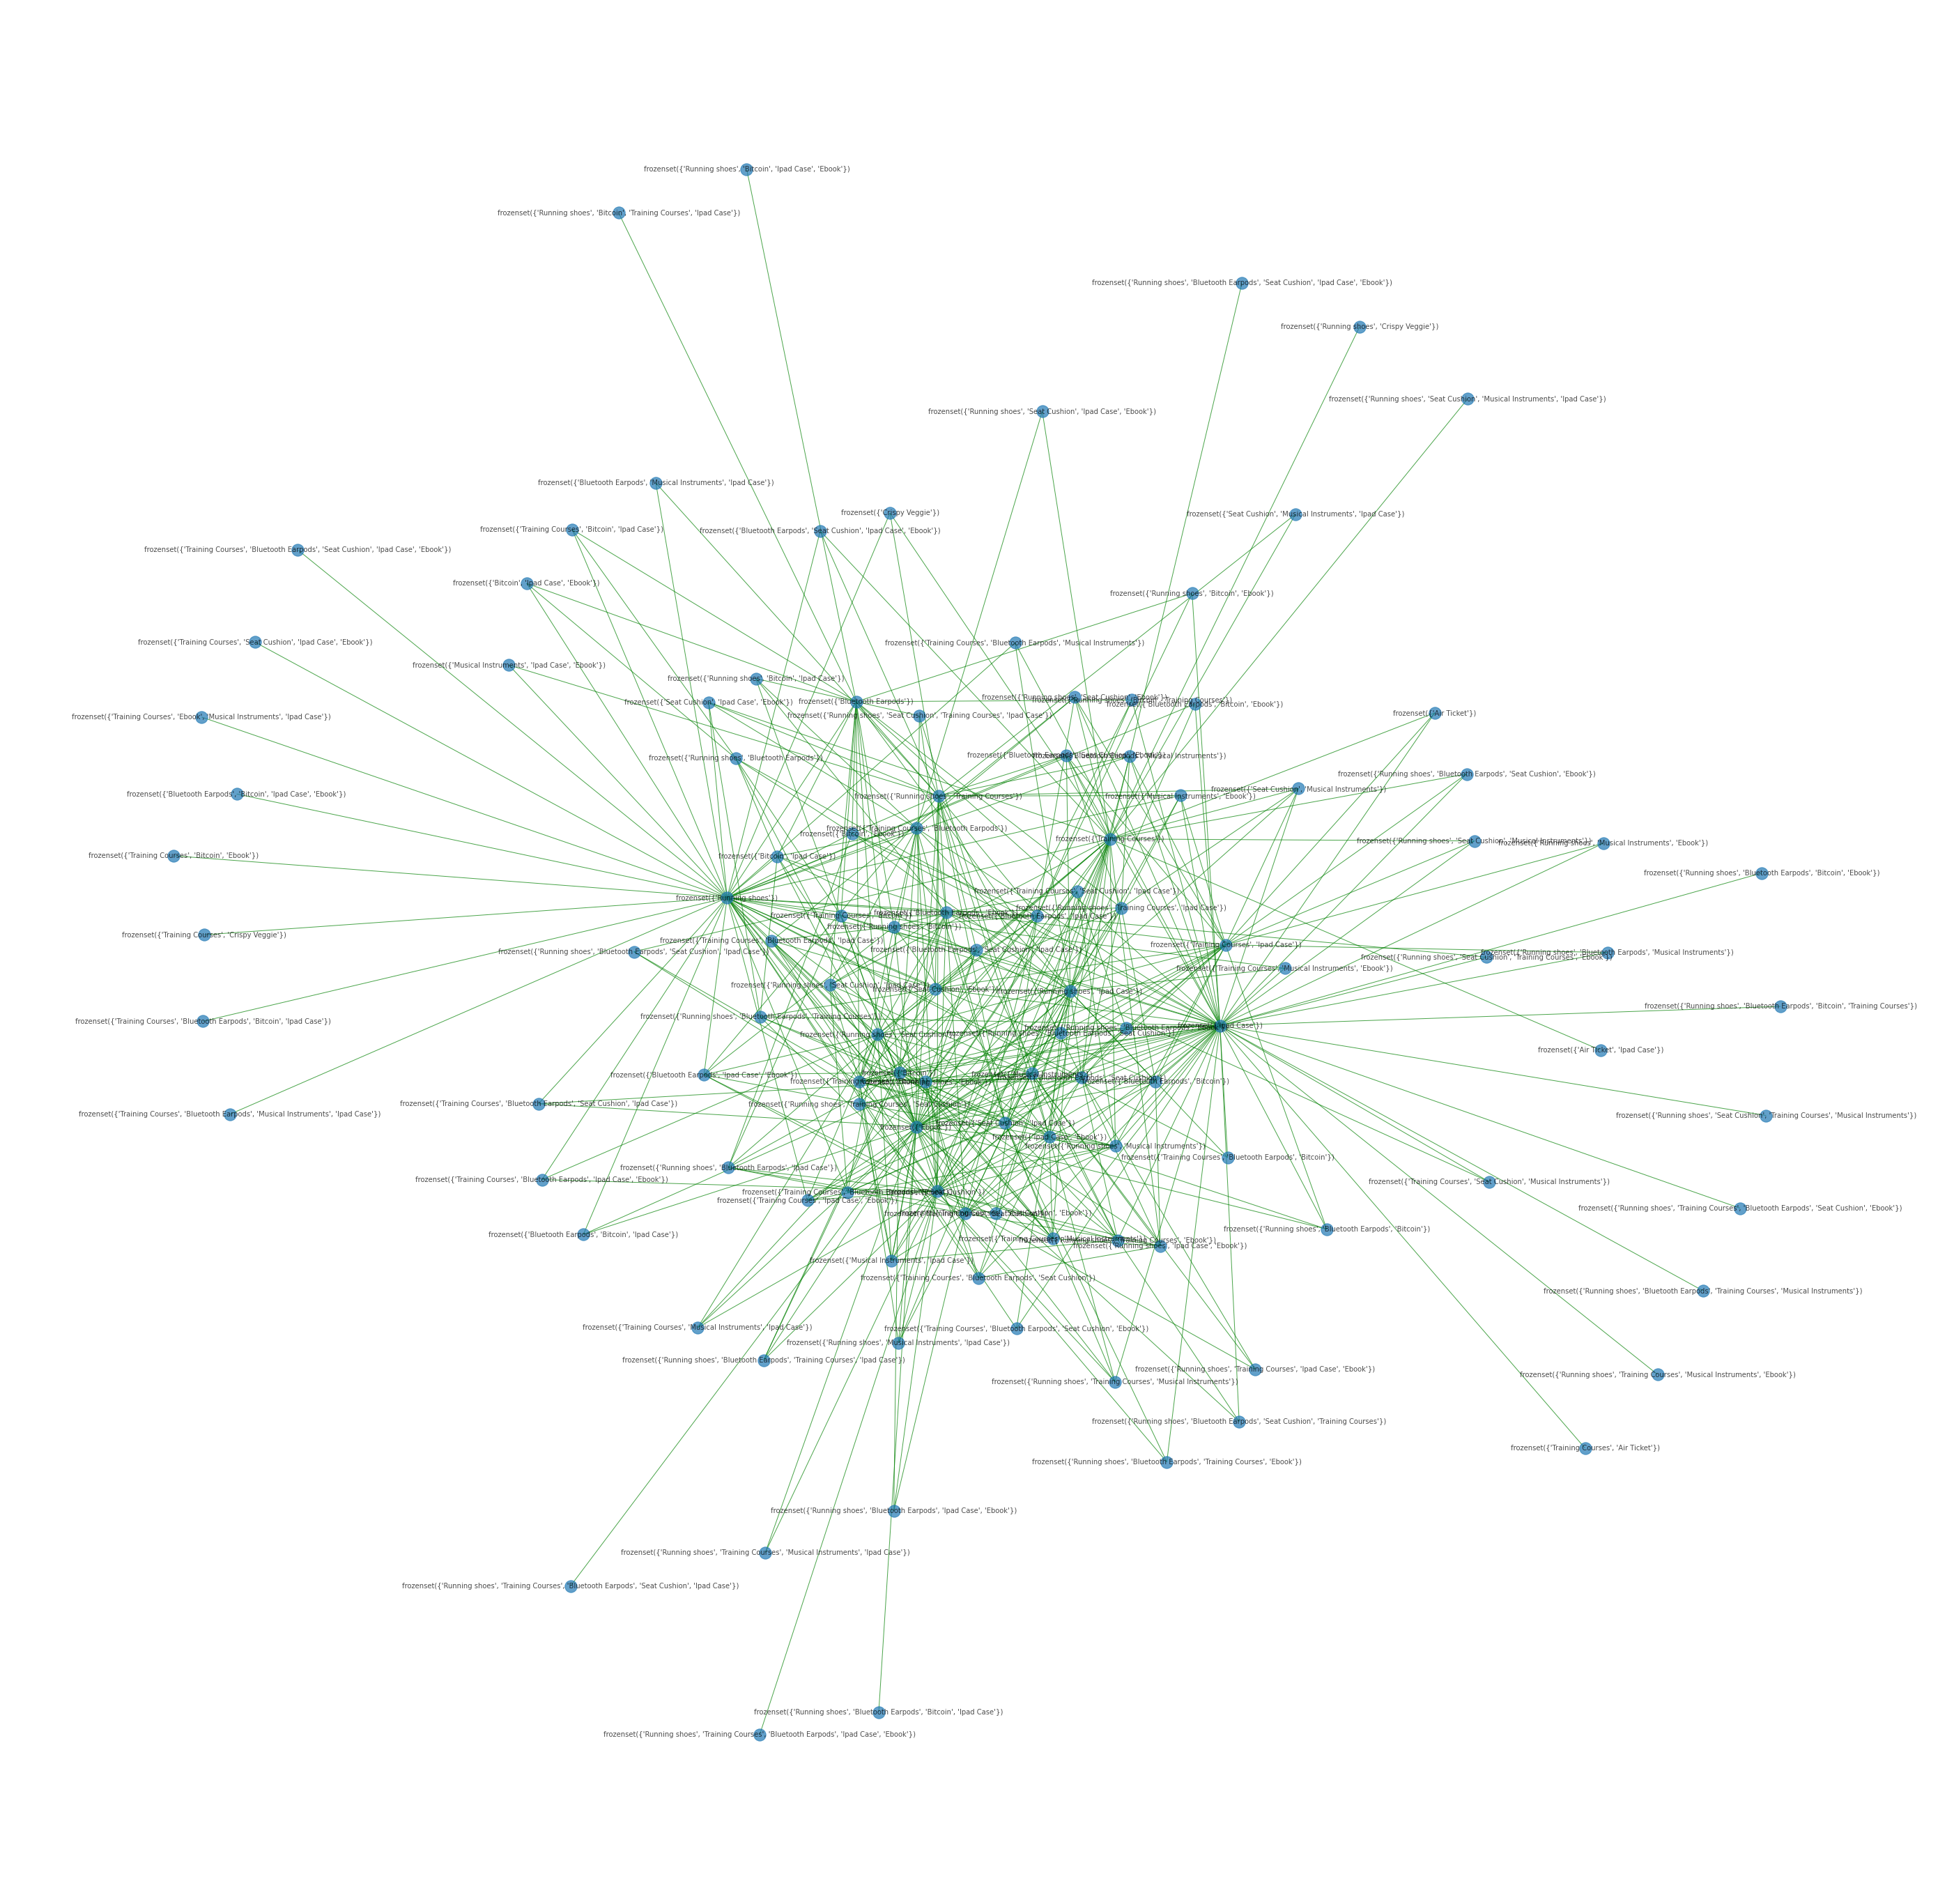

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(50,50))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,alpha = 0.7,node_size = 300,font_size=10,edge_color='g')
plt.show()

In [ ]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

Product network and relation for only 1 product

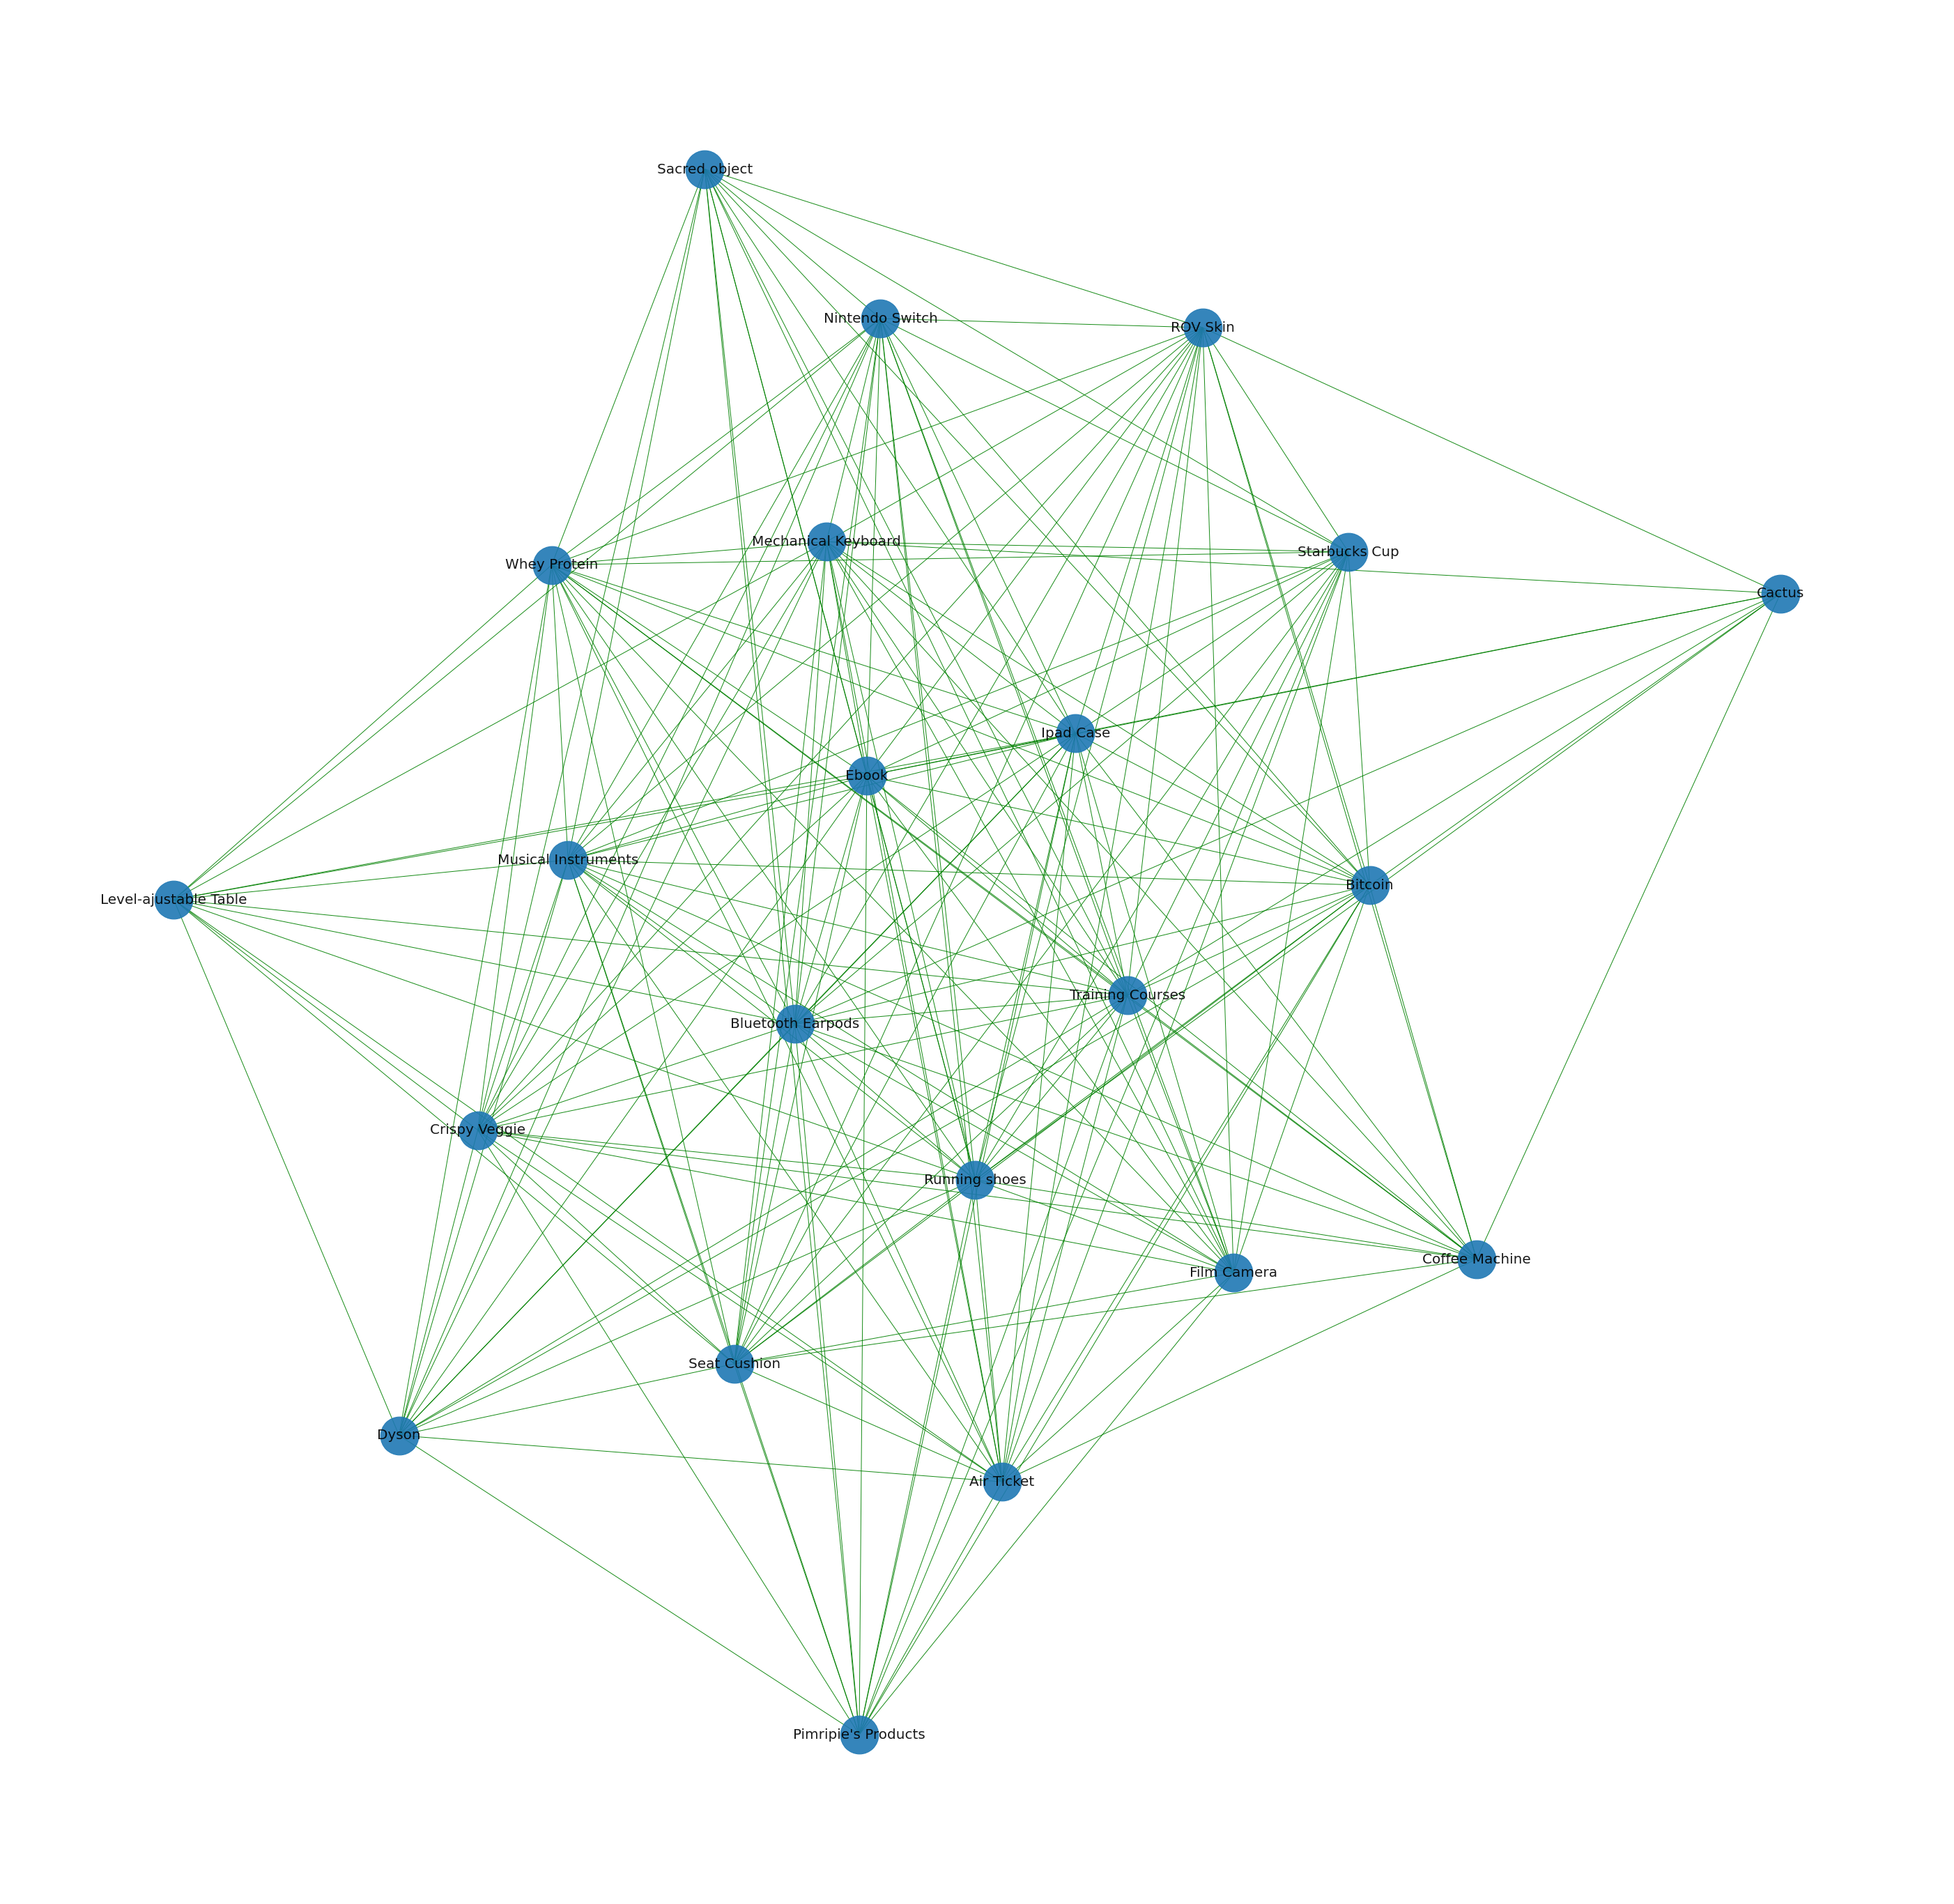

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(50,50))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True,alpha = 0.9,node_size = 3000,font_size=20,edge_color='g')
plt.show()

THe histogram shown the product with purchasing history

<BarContainer object of 22 artists>

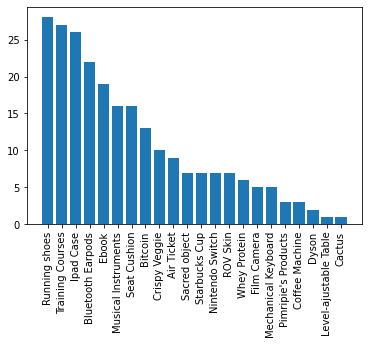

In [ ]:
df2 = df.T
df2['count'] = df2.sum(axis=1)
df_sorted = df2.sort_values('count',ascending = False)

plt.xticks(rotation=90)
plt.bar(df_sorted.index,df_sorted['count'],align='center')

# **Summarize**

According to the product recomendation result, there are 2 interesting rules found during execution

1.   The customers who bought Bluetooth Earpods and Ebook have potential to buy Bitcoin. It may imply that the customers who bought Bluetooth Earpods and Ebook	tend to be familiar with the new technology or hi-tech lover which improve the probability that customers will buy Bitcoin. We may launch the campaign that you can accumulate points when you buy Ebook and then exchange to the small amount of Bitcoin.
2.   The customers who bought musical instrument have potential to buy Film camera. The two things can be identified as the mix of art and science. Therefore, we should try to manage the musical instrument and Film camera products near each other.